In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [13]:
import requests
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-17.226085608423276 111.71573791151957
-54.59521097275188 -24.691090990357026
-21.30342137648617 -87.25504657832916
39.338079927583124 57.46173453151107
25.153028825401137 -4.120967494193167
-61.69095816882607 -57.53515112755014
-78.92258876722846 -133.14463516647473
8.70646146236676 102.60086999439346
-21.369593519533467 -77.9633981966008
43.75706739048573 120.55257837407504
-28.57063624853202 -35.013454800313326
-9.376914610738396 -138.1163084549318
70.25836009843641 156.88368100128787
55.435528775097254 69.89155213767825
31.928165163897148 -77.2616765190622
-7.675072953947577 -37.951907716194796
18.88225565614043 -147.50564478174317
5.570004607254177 94.74330678026428
1.799652124089647 48.77826363339412
74.5224494301356 -100.04118530775649
29.056473184742288 45.53200966941944
-71.4550074345942 141.6700948431997
9.131750591391508 52.170371164547134
32.44723872616194 -96.8523405390528
70.87832552723862 123.66457130094528
-42.51851140001766 -8.770237563123544
-77.90575469322945 123.949

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [7]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 toS the record count
    record_count += 1

#Run an API request for each of the cites 
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat, 
                          'Lng': city_lng, 
                          'Max Temp': city_max_temp, 
                          'Humidity': city_humidity, 
                          'Cloudiness': city_clouds, 
                          'Wind Speed': city_wind, 
                          'Country': city_country, 
                          'Date': city_date})
#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that the Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | karratha
Processing Record 2 of Set 1 | cidreira
Processing Record 3 of Set 1 | pisco
Processing Record 4 of Set 1 | baherden
Processing Record 5 of Set 1 | taoudenni
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | yaring
Processing Record 9 of Set 1 | marcona
City not found. Skipping...
Processing Record 10 of Set 1 | tongliao
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | srednekolymsk
Processing Record 14 of Set 1 | sladkovo
Processing Record 15 of Set 1 | north myrtle beach
Processing Record 16 of Set 1 | tavares
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | banda aceh
Processing Record 19 of Set 1 | jawhar
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | doha
Processing Record 22 of Set 1 | hobart
Processing Rec

Processing Record 37 of Set 4 | san patricio
Processing Record 38 of Set 4 | bukavu
Processing Record 39 of Set 4 | kamaishi
Processing Record 40 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 4 | beitbridge
Processing Record 42 of Set 4 | lagoa
Processing Record 43 of Set 4 | constantine
Processing Record 44 of Set 4 | tucurui
Processing Record 45 of Set 4 | gualeguay
Processing Record 46 of Set 4 | toulepleu
City not found. Skipping...
Processing Record 47 of Set 4 | douglas
Processing Record 48 of Set 4 | ancud
Processing Record 49 of Set 4 | provideniya
Processing Record 50 of Set 4 | santo antonio do sudoeste
Processing Record 1 of Set 5 | karaul
City not found. Skipping...
Processing Record 2 of Set 5 | padang
Processing Record 3 of Set 5 | pecos
Processing Record 4 of Set 5 | inhambane
Processing Record 5 of Set 5 | bokspits
City not found. Skipping...
Processing Record 6 of Set 5 | miguel alves
Processing Record 7 of Set 5 | kosh-agach
Processing

Processing Record 28 of Set 8 | port augusta
Processing Record 29 of Set 8 | visby
Processing Record 30 of Set 8 | buqayq
City not found. Skipping...
Processing Record 31 of Set 8 | umm lajj
Processing Record 32 of Set 8 | kasongo-lunda
Processing Record 33 of Set 8 | puerto madero
Processing Record 34 of Set 8 | amahai
Processing Record 35 of Set 8 | portland
Processing Record 36 of Set 8 | bogande
Processing Record 37 of Set 8 | tilichiki
Processing Record 38 of Set 8 | makarov
Processing Record 39 of Set 8 | renkum
Processing Record 40 of Set 8 | east london
Processing Record 41 of Set 8 | gobabis
Processing Record 42 of Set 8 | shache
Processing Record 43 of Set 8 | el reten
Processing Record 44 of Set 8 | northam
Processing Record 45 of Set 8 | bilma
Processing Record 46 of Set 8 | iskateley
Processing Record 47 of Set 8 | shu
Processing Record 48 of Set 8 | dalvik
Processing Record 49 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 50 of Set 8 | grimari
City n

Processing Record 17 of Set 12 | temiscaming
Processing Record 18 of Set 12 | sao joao da barra
Processing Record 19 of Set 12 | tarrafal
Processing Record 20 of Set 12 | itoman
Processing Record 21 of Set 12 | ulundi
Processing Record 22 of Set 12 | westport
Processing Record 23 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 24 of Set 12 | morant bay
Processing Record 25 of Set 12 | vung tau
Processing Record 26 of Set 12 | vardo
Processing Record 27 of Set 12 | datong
Processing Record 28 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 29 of Set 12 | salinopolis
Processing Record 30 of Set 12 | sandavagur
City not found. Skipping...
Processing Record 31 of Set 12 | dakar
Processing Record 32 of Set 12 | svetlaya
Processing Record 33 of Set 12 | yerbogachen
Processing Record 34 of Set 12 | grand gaube
Processing Record 35 of Set 12 | japura
Processing Record 36 of Set 12 | jibuti
Processing Record 37 of Set 12 | sao jose da coroa grande
Processin

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Karratha,-20.7377,116.8463,79.34,22,8,19.06,AU,2022-09-17 01:16:41
1,Cidreira,-30.1811,-50.2056,60.66,81,0,13.51,BR,2022-09-17 01:16:41
2,Pisco,-13.7000,-76.2167,59.05,88,20,9.22,PE,2022-09-17 01:16:41
3,Baherden,38.4362,57.4316,69.03,34,80,1.43,TM,2022-09-17 01:16:42
4,Taoudenni,22.6783,-3.9836,91.56,17,0,8.50,ML,2022-09-17 01:16:42
5,Ushuaia,-54.8000,-68.3000,42.46,61,75,8.05,AR,2022-09-17 01:16:42
6,Rikitea,-23.1203,-134.9692,72.41,71,0,14.61,PF,2022-09-17 01:16:43
7,Yaring,6.8662,101.3689,80.89,76,73,8.95,TH,2022-09-17 01:16:43
8,Tongliao,43.6125,122.2653,65.34,67,100,4.74,CN,2022-09-17 01:16:44
9,Arraial Do Cabo,-22.9661,-42.0278,66.54,75,98,10.67,BR,2022-09-17 01:16:44


In [9]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
new_column_order

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [10]:
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Karratha,AU,2022-09-17 01:16:41,-20.7377,116.8463,79.34,22,8,19.06
1,Cidreira,BR,2022-09-17 01:16:41,-30.1811,-50.2056,60.66,81,0,13.51
2,Pisco,PE,2022-09-17 01:16:41,-13.7000,-76.2167,59.05,88,20,9.22
3,Baherden,TM,2022-09-17 01:16:42,38.4362,57.4316,69.03,34,80,1.43
4,Taoudenni,ML,2022-09-17 01:16:42,22.6783,-3.9836,91.56,17,0,8.50


In [11]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

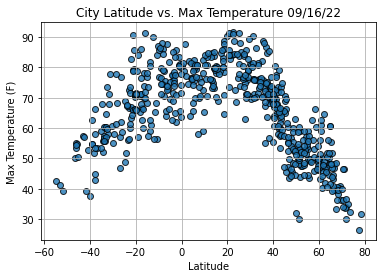

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

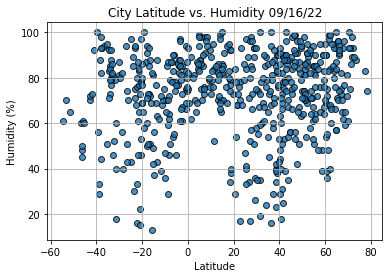

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

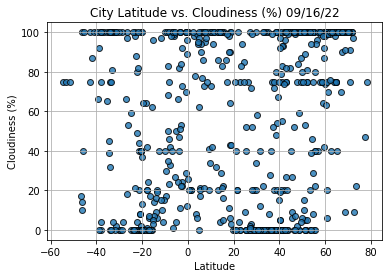

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

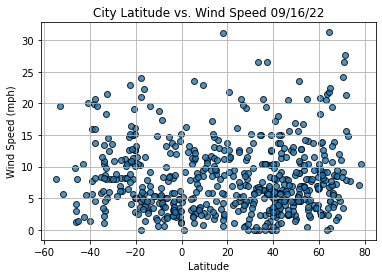

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]

In [23]:
index13

City           North Myrtle Beach
Country                        US
Date          2022-09-17 01:14:55
Lat                        33.816
Lng                        -78.68
Max Temp                    76.06
Humidity                       85
Cloudiness                      0
Wind Speed                    0.0
Name: 13, dtype: object

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Baherden,TM,2022-09-17 01:16:42,38.4362,57.4316,69.03,34,80,1.43
4,Taoudenni,ML,2022-09-17 01:16:42,22.6783,-3.9836,91.56,17,0,8.50
7,Yaring,TH,2022-09-17 01:16:43,6.8662,101.3689,80.89,76,73,8.95
8,Tongliao,CN,2022-09-17 01:16:44,43.6125,122.2653,65.34,67,100,4.74
11,Srednekolymsk,RU,2022-09-17 01:16:44,67.4500,153.6833,39.51,65,90,8.57
...,...,...,...,...,...,...,...,...,...
565,Southbridge,US,2022-09-17 01:19:47,42.0751,-72.0334,60.67,88,74,4.00
568,Ilawa,PL,2022-09-17 01:19:48,53.5960,19.5685,51.78,71,39,10.27
570,Balkhash,KZ,2022-09-17 01:19:49,46.8440,74.9804,43.41,56,0,15.66
571,Hovd,MN,2022-09-17 01:19:49,48.0056,91.6419,44.06,65,84,4.50


In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Baherden,TM,2022-09-17 01:16:42,38.4362,57.4316,69.03,34,80,1.43
4,Taoudenni,ML,2022-09-17 01:16:42,22.6783,-3.9836,91.56,17,0,8.50
7,Yaring,TH,2022-09-17 01:16:43,6.8662,101.3689,80.89,76,73,8.95
8,Tongliao,CN,2022-09-17 01:16:44,43.6125,122.2653,65.34,67,100,4.74
11,Srednekolymsk,RU,2022-09-17 01:16:44,67.4500,153.6833,39.51,65,90,8.57


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

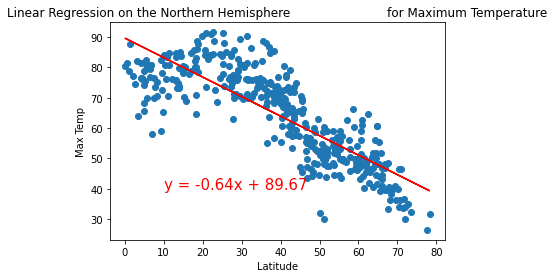

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

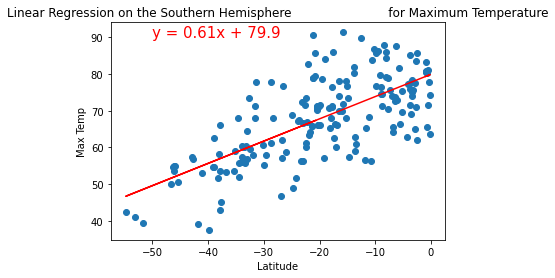

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

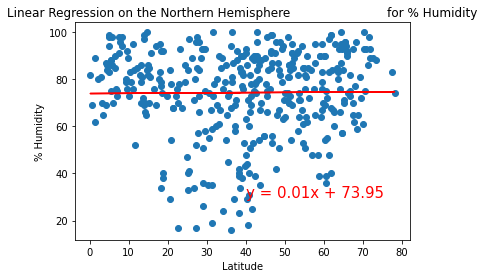

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,30))

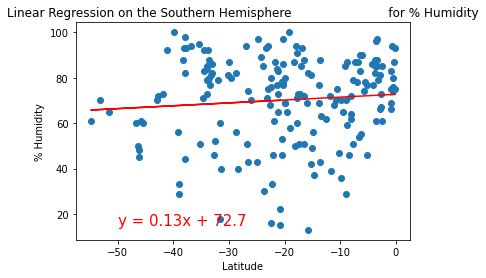

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

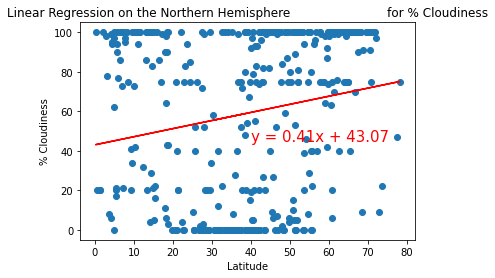

In [40]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,45))

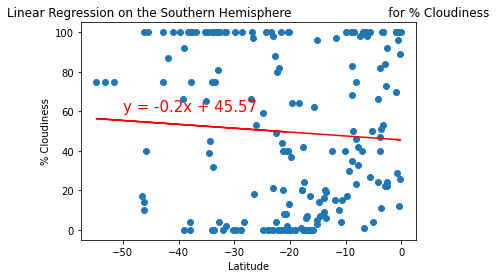

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

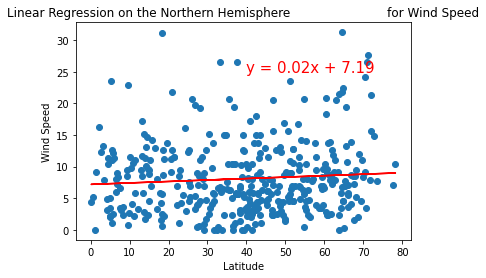

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

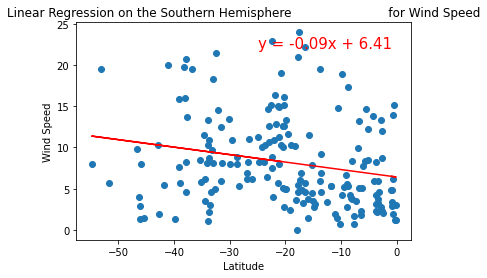

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-25,22))